Instructions:

This project works via the functions of final.py

f_k(t) may be used by inputting in a temperature t in fahrenheit; it will convert that to kelvin. 

parse(path) parses through a file defined by path and finds the temperature value. The file must be of a format such that a line reads 
"Temperature: t" where t is the temperature and there can be no empty lines.

file_list(path, filter) will search through all the files found in the folder or file related to the input file path (that is the path parameter) If any files contain the filter, which is a string, those filenames will be added to a list which the function returns. "walk.csv" works as a filter for the csv files containing lon/lat data for the sin walks. "meta" works as a filter for the metafiles.

model(x, a,b,c) returns a sin function of x defined by a*sin(b*x+c). This is used for the nonlinear fitting.

residuals(params, x, y) takes in a list of parameters [a,b,c], x, and y and uses model(x,a,b,c) to calculate the difference between the expected function from the parameters and the actual function y. This difference is the residual, which is returned. 

jacobian(x, params) takes in an array x and parameters [a,b,c] and uses them to calculate the jacobian in relation to the parameters. This is then returned. Again, this is related to the nonlinear fitting.

gauss_newton(x, y, initial_params, n, max_iter=100, tolerance=1e-6) takes in x and y data, initial_params, which is a list of parameters [a,b,c] defined by the user, n, which will define the number of points along the fit as 2^n. This function will use jacobian, residuals, and model to conduct the nonlinear fit. It does need good initial parameters to be successful; as such, good parameters for each walk have been stored in sin_data/plots as a .md file. It is important to choose a good value for n as this fit is what will be used for the fft.

get_sin_data(path) takes in a path defined by the user, which must lead to a csv file containing latitudinal and longitudinal data and returns the data relating to the path taken. It is called specifically get_sin_data() as it is only used to get the sin waves. 

subtract_ave(y) calculates the average value of the sin_data and subtracts it from the y-data. This prepares the data for the fft methods by centering the data about the x-axis.

wrap_fft(x,y,inverse) takes in x and y data, as well as a boolean, to either take the fft or inverse fft of the data via wrapper functions.
If inverse is True, it does the inverse fft. If False, the fft. It does include functionality to catch data that is not equidistant and stop the process. 

get_params(name) takes in the name of a file and finds the corresponding parameters needed to fit a sin function to the data from the parameters.md file. It then returns these parameters as a list [a,b,c]

get_frequency_axis(x, n) takes in x and n where x is the x data and n is the variable defining the number of points (2^n). It uses these to manually calculate the frequency axis and return that.

get_frequency(x,y) finds the highest magnitude within a fourier transform defined by the x and y data and returns the frequency and magnitude at that point. 

the test_final.py module contains testing functions which verify the functionality of all these functions via pytest

Bibliography: 

Wikipedia contributors. (2024, November 13). Gauss–Newton algorithm. Wikipedia. https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm

This website provided some background info on the gauss-newton method

Chat Gpt. (n.d.). chatgpt.com. https://chatgpt.com

Chat Gpt acted as a general guide whenever I ran into a problem


/workspaces/CP1-24-final/abruns123/code
Converged after 13 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 15 iterations
Converged after 12 iterations
Converged after 17 iterations
Converged after 11 iterations
Converged after 11 iterations
Converged after 32 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 11 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 14 iterations


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Text(0, 0.5, 'Meters (m)')

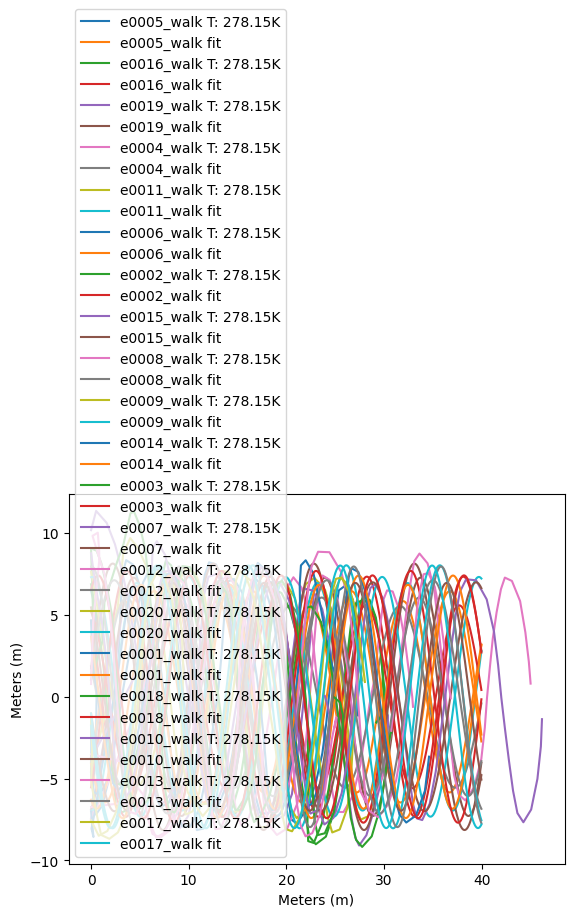

In [36]:
%cd ../code

import final as fin
import numpy as np
import matplotlib.pyplot as plt

experiments=fin.file_list("/workspaces/CP1-24-final/abruns123/data/sin_data", ".csv")

for f in experiments:
    meta_file=f.replace("walk.csv", "meta.md")
    t=fin.parse("/workspaces/CP1-24-final/abruns123/data/sin_data/"+meta_file)
    ke=fin.f_k(t)
    x,y=fin.get_sin_data("/workspaces/CP1-24-final/abruns123/data/sin_data/"+ f)
    name=f.replace(".csv", "")
    x=abs(np.array(x))
    y=fin.subtract_ave(y)
    p1,p2,p3=fin.get_params(f)
    func, new_x=fin.gauss_newton(np.array(x),y, [p1,p2,p3], 10)[1:]
    plt.plot(x,y, label=name+" T: "+str(ke)+"K")
    plt.plot(new_x,func, label=name+" fit")
plt.legend(loc="lower left")
plt.xlabel("Meters (m)")
plt.ylabel("Meters (m)")
    

Converged after 13 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 15 iterations
Converged after 12 iterations
Converged after 17 iterations
Converged after 11 iterations
Converged after 11 iterations
Converged after 32 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 11 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 14 iterations


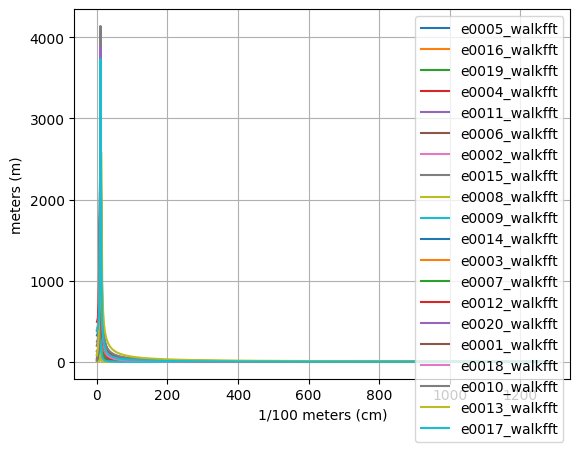

In [37]:

for f in experiments:
    x,y=fin.get_sin_data("/workspaces/CP1-24-final/abruns123/data/sin_data/"+ f)
    name=f.replace(".csv", "")
    x=abs(np.array(x))
    y=fin.subtract_ave(y)
    p1,p2,p3=fin.get_params(f)
    func, new_x=fin.gauss_newton(np.array(x),y, [p1,p2,p3], 10)[1:]
    raw_fft=fin.wrap_fft(new_x,func, False)
    fft=np.abs(raw_fft[:int(len(raw_fft)/2)])
    frequency=fin.get_frequency_axis(new_x,10)
    positive_f=100*frequency[int((2**10)/2):]
    plt.plot(positive_f, fft, label=name+"fft")

plt.xlabel("1/100 meters (cm)")
plt.ylabel("meters (m)")
plt.grid()
plt.legend()
plt.show()


Converged after 13 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 15 iterations
Converged after 12 iterations
Converged after 17 iterations
Converged after 11 iterations
Converged after 11 iterations
Converged after 32 iterations
Converged after 9 iterations
Converged after 8 iterations
Converged after 12 iterations


/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarnin

Converged after 8 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 7 iterations
Converged after 11 iterations
Converged after 12 iterations
Converged after 8 iterations
Converged after 14 iterations


/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarnin

Text(0, 0.5, 'Meters (m)')

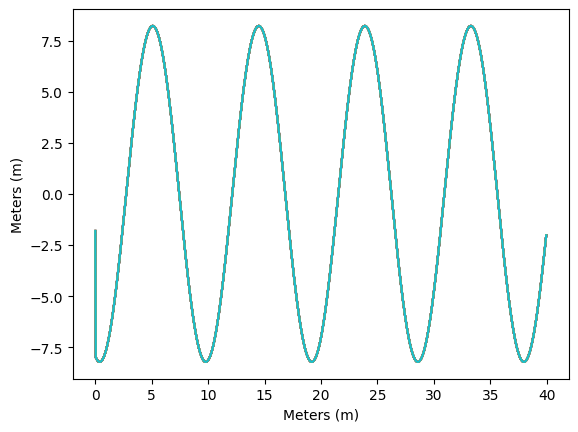

In [38]:
for f in experiments:
    x,y=fin.get_sin_data("/workspaces/CP1-24-final/abruns123/data/sin_data/"+ f)
    name=f.replace(".csv", "")
    x=abs(np.array(x))
    y=fin.subtract_ave(y)
    p1,p2,p3=fin.get_params(f)
    func, new_x=fin.gauss_newton(np.array(x),y, [p1,p2,p3], 10)[1:]
    fft=np.abs(raw_fft[:int(len(raw_fft)/2)])
    frequency=fin.get_frequency_axis(new_x,10)
    ifft=fin.wrap_fft(frequency, raw_fft, True)/1000
    plt.plot(new_x, ifft,label=name+"ifft")
plt.xlabel("Meters (m)")
plt.ylabel("Meters (m)")
    